# Homework 4

## Your Name Here: Shruthi Garla sg54464 and Odette Saenz oss286

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression.

We will use the New York City Taxi trip reports in the Year 2013.
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps.
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  |
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  |
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  |
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [29]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [38]:
# Read the file after it's moved
df = pd.read_csv('/Users/odettesaenz/CS329E/asssignment4/nyc-taxi-data 2.csv')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record.

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data.

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [51]:
# Task 1: Add column headers
df.columns = ["medallion", "hack_license", "pickup_datetime", "dropoff_datetime", "trip_time_in_secs", 
              "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", 
              "payment_type", "fare_amount", "surcharge", "mta_tax", "tip_amount", "tolls_amount", "total_amount"]

# Task 2: Drop rows where travel distance is less than 1 mile and total fare is greater than $20
df = df[~((df['trip_distance'] < 1) & (df['total_amount'] > 20))]

# Task 3: Drop rows with trip_distance == 0 (these could represent invalid records)
df = df[df['trip_distance'] > 0]

# Task 4: Drop rows with negative fare_amount values, as these are likely invalid
df = df[df['fare_amount'] >= 0]

# Verify the cleanup by checking the first few rows
df.head()

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.7,0.0,4.7
7,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.0,0.0,7.5


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

Correlation Matrix:
                   trip_distance  trip_time_in_secs  fare_amount
trip_distance           1.000000           0.774989     0.937853
trip_time_in_secs       0.774989           1.000000     0.845473
fare_amount             0.937853           0.845473     1.000000


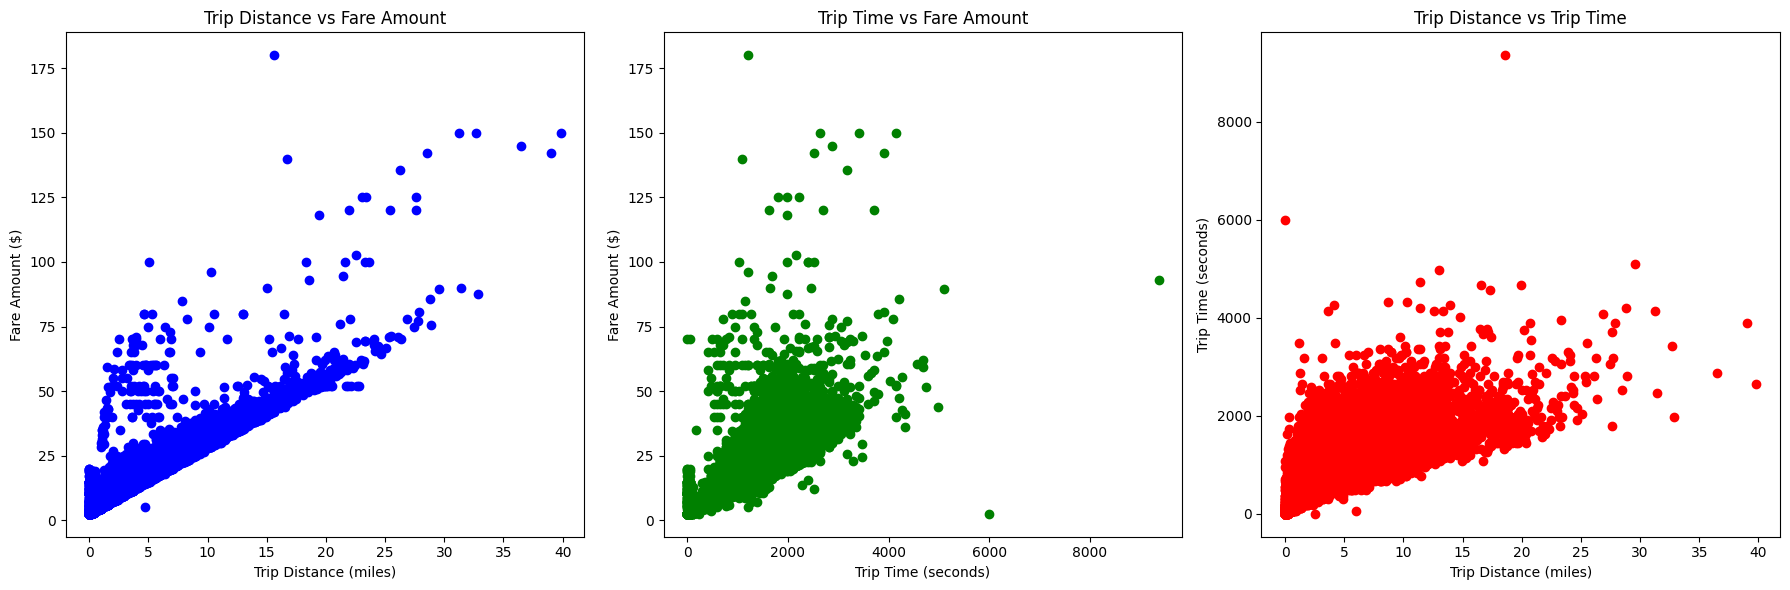

In [42]:
# Task 2: Calculate the correlation matrix and create scatter plots

# Calculate the correlation matrix for the relevant columns
cr = df_cleaned[['trip_distance', 'trip_time_in_secs', 'fare_amount']].corr()
print("Correlation Matrix:")
print(cr)

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot: Trip Distance vs Fare Amount
axs[0].scatter(df_cleaned['trip_distance'], df_cleaned['fare_amount'], color='blue')
axs[0].set_title('Trip Distance vs Fare Amount')
axs[0].set_xlabel('Trip Distance (miles)')
axs[0].set_ylabel('Fare Amount ($)')

# Scatterplot: Trip Time vs Fare Amount
axs[1].scatter(df_cleaned['trip_time_in_secs'], df_cleaned['fare_amount'], color='green')
axs[1].set_title('Trip Time vs Fare Amount')
axs[1].set_xlabel('Trip Time (seconds)')
axs[1].set_ylabel('Fare Amount ($)')

# Scatterplot: Trip Distance vs Trip Time
axs[2].scatter(df_cleaned['trip_distance'], df_cleaned['trip_time_in_secs'], color='red')
axs[2].set_title('Trip Distance vs Trip Time')
axs[2].set_xlabel('Trip Distance (miles)')
axs[2].set_ylabel('Trip Time (seconds)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


The correlation matrix reveals several important relationships between trip distance, trip time, and fare amount. The strongest correlation is between trip distance and fare amount, with a coefficient of 0.938, indicating a very strong positive relationship. This suggests that as the trip distance increases, the fare amount tends to increase proportionally, making trip distance the most accurate predictor of fare amount. There is also a strong positive correlation between trip time and fare amount (0.845), meaning that longer trips generally result in higher fares, although the correlation is slightly weaker than that of trip distance and fare amount. Finally, the correlation between trip distance and trip time is moderate, with a coefficient of 0.775, showing that longer trips usually take more time. However, this correlation is not as strong, likely due to other factors such as traffic conditions, route selection, or speed. Overall, while trip distance is the strongest predictor of fare amount, trip time is also an important factor, though it is influenced by additional variables beyond just distance.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money).
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation.
* Use your model to predict the fare amount for a 3 miles trip.

A visualization of the model is not required, but it would be nice to have and good practice.

Intercept: 3.7480690617316057
Slope: 2.8613057461255718
Linear Regression Equation: Fare Amount = 3.75 + 2.86 * Trip Distance
Predicted fare for a 3-mile trip: $12.33


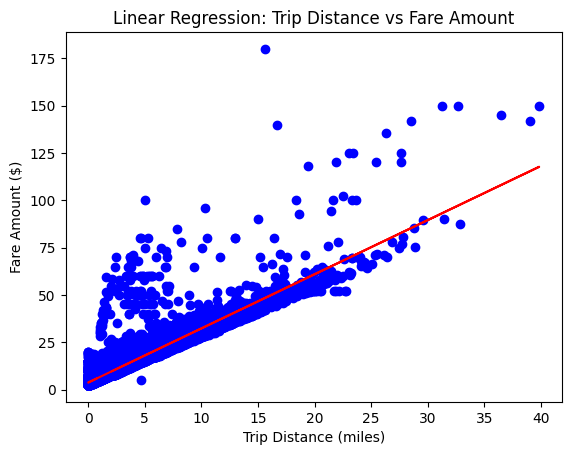

In [53]:
# Assuming df_cleaned is your cleaned dataset from Task 1
new_df = df_cleaned

# Prepare data for regression
x = new_df[['trip_distance']]  # Independent variable (trip distance)
y = new_df['fare_amount']      # Dependent variable (fare amount)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data (i.e., find the best line that fits the data)
model.fit(x, y)

# Get the regression coefficients (intercept and slope)
intercept = model.intercept_  # The y-intercept of the regression line
slope = model.coef_[0]       # The slope of the regression line (i.e., how much fare increases with distance)

# Print the regression coefficients
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Write down the linear regression equation
print(f"Linear Regression Equation: Fare Amount = {intercept:.2f} + {slope:.2f} * Trip Distance")

# Create a DataFrame with the same column name as in the training data
prediction_input = pd.DataFrame([[3]], columns=['trip_distance'])  # Predict for a 3-mile trip

# Predict the fare amount for the 3-mile trip using the model
predicted_fare = model.predict(prediction_input)  
print(f"Predicted fare for a 3-mile trip: ${predicted_fare[0]:.2f}")

# Optional: Visualize the model with a scatter plot and regression line
plt.scatter(new_df['trip_distance'], new_df['fare_amount'], color='blue')  # Scatter plot of actual data points
plt.plot(new_df['trip_distance'], model.predict(x), color='red')  # Plot the regression line
plt.title('Linear Regression: Trip Distance vs Fare Amount')  # Title of the plot
plt.xlabel('Trip Distance (miles)')  # X-axis label
plt.ylabel('Fare Amount ($)')  # Y-axis label
plt.show()  # Show the plot


## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation.
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time.

A visualization of the model is not required, but it would be nice to have and good practice.

Intercept: 3.1502501051672045
Coefficients: [2.45081294 0.00536665]
Multiple Linear Regression Equation: Total Amount = 3.15 + 2.45 * Trip Distance + 0.0054 * Trip Time
Predicted total amount for a 3-mile trip and 6 minutes travel time: $12.43


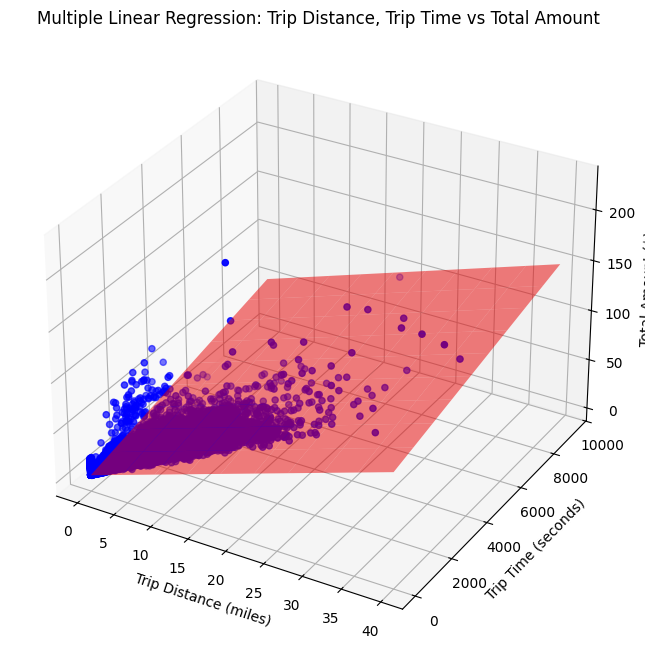

In [54]:
# Prepare data for regression
# X contains the independent variables: trip_distance and trip_time_in_secs
# y contains the dependent variable: total_amount
X = new_df[['trip_distance', 'trip_time_in_secs']]  # Independent variables
y = new_df['total_amount']                         # Dependent variable

# Create a Multiple Linear Regression model
model = LinearRegression()

# Fit the model to the data (this will calculate the optimal regression coefficients)
model.fit(X, y)

# Get the regression coefficients (intercept and slopes for each independent variable)
intercept = model.intercept_
coefficients = model.coef_

# Print the regression coefficients
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Write down the Multiple Linear Regression equation
print(f"Multiple Linear Regression Equation: Total Amount = {intercept:.2f} + {coefficients[0]:.2f} * Trip Distance + {coefficients[1]:.4f} * Trip Time")

# Predict the total amount for a 3-mile trip and 6 minutes (360 seconds) travel time
# Use pd.DataFrame to remove the warning
predicted_amount = model.predict(pd.DataFrame([[3, 360]], columns=['trip_distance', 'trip_time_in_secs']))  # Input: 3 miles and 6 minutes (360 seconds)
print(f"Predicted total amount for a 3-mile trip and 6 minutes travel time: ${predicted_amount[0]:.2f}")


# Optional: Visualization of the model's predictions vs actual data
# Here we create a 3D scatter plot of the data (trip_distance, trip_time_in_secs, total_amount)
# and plot the predictions using the regression model for comparison.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(new_df['trip_distance'], new_df['trip_time_in_secs'], new_df['total_amount'], color='blue', label='Actual Data')

# Plot the regression plane (this is an approximation since we have 2 independent variables)
# Generate a grid of values for trip_distance and trip_time_in_secs
trip_distance_range = np.linspace(new_df['trip_distance'].min(), new_df['trip_distance'].max(), 10)
trip_time_range = np.linspace(new_df['trip_time_in_secs'].min(), new_df['trip_time_in_secs'].max(), 10)
trip_distance_grid, trip_time_grid = np.meshgrid(trip_distance_range, trip_time_range)

# Use the model to predict total_amount for every combination of trip_distance and trip_time_in_secs
predicted_plane = intercept + coefficients[0] * trip_distance_grid + coefficients[1] * trip_time_grid

# Plot the predicted regression plane
ax.plot_surface(trip_distance_grid, trip_time_grid, predicted_plane, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Trip Distance (miles)')
ax.set_ylabel('Trip Time (seconds)')
ax.set_zlabel('Total Amount ($)')
ax.set_title('Multiple Linear Regression: Trip Distance, Trip Time vs Total Amount')

# Show the plot
plt.show()

## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance.

Please note that a visualization **is** required, unlike in Task 3 and 4.

Gradient Descent has converged at iteration 74
Intercept: 1.4934923467426062
Slope: 3.27020806361866
Linear Regression Equation: Fare Amount = 1.49 + 3.27 * Trip Distance


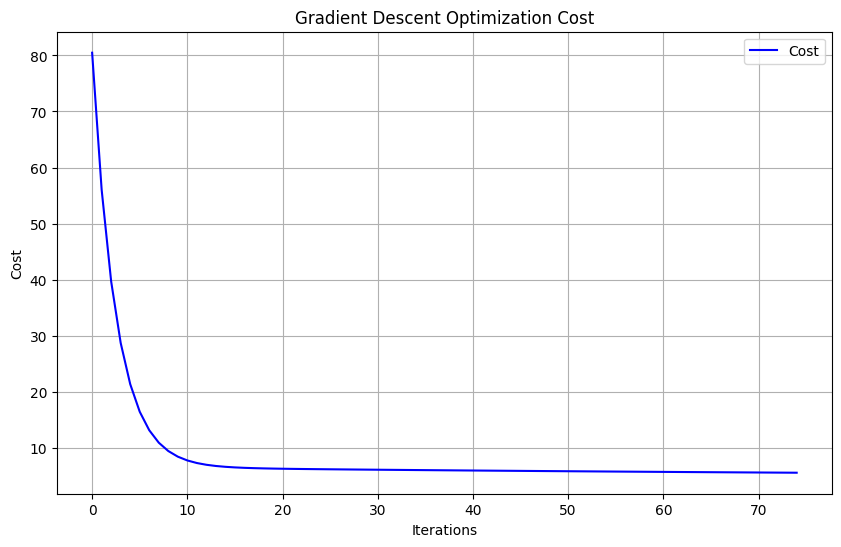

Predicted fare amount for a 3-mile trip: $11.30


In [50]:
# Extracts relevant data
X = new_df['trip_distance'].values
y = new_df['fare_amount'].values

# Initialize parameters
m = len(y)                  # Number of data points
X = X.reshape((m, 1))       # Reshape X to be a column vector
y = y.reshape((m, 1))       # Reshape y to be a column vector
X = np.c_[np.ones(m), X]    # Add a column of ones for the intercept term

# Hyperparameters
learning_rate = 0.01
iterations = 400
precision = 0.01

# Initialize coefficients
theta = np.zeros((2, 1))

# Cost function
def compute_cost(X, y, theta):
    predictions = np.dot(X, theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

# Gradient Descent
cost_history = []

for i in range(iterations):
    predictions = np.dot(X, theta)
    errors = predictions - y
    gradient = (1/m) * np.dot(X.T, errors)
    theta -= learning_rate * gradient

    # Calculate cost for the current iteration
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)

    # Stop if the cost converges
    if i > 0 and abs(cost_history[-2] - cost_history[-1]) < precision:
        print(f"Gradient Descent has converged at iteration {i}")
        break

# Final parameters
intercept, slope = theta.flatten()
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"Linear Regression Equation: Fare Amount = {intercept:.2f} + {slope:.2f} * Trip Distance")

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, label='Cost', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Optimization Cost')
plt.grid(True)
plt.legend()
plt.show()

# Prediction for a 3-mile trip
predicted_amount = intercept + slope * 3
print(f"Predicted fare amount for a 3-mile trip: ${predicted_amount:.2f}")
